<a href="https://colab.research.google.com/github/chahatpatel2003/CSCI-167/blob/main/notebook4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

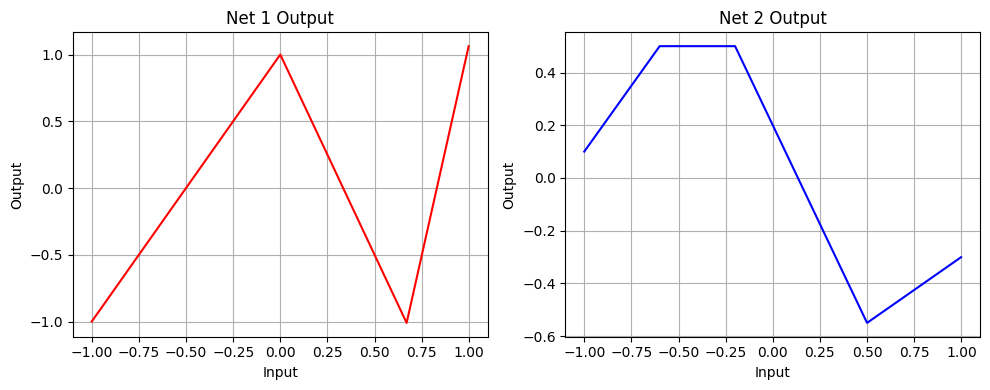

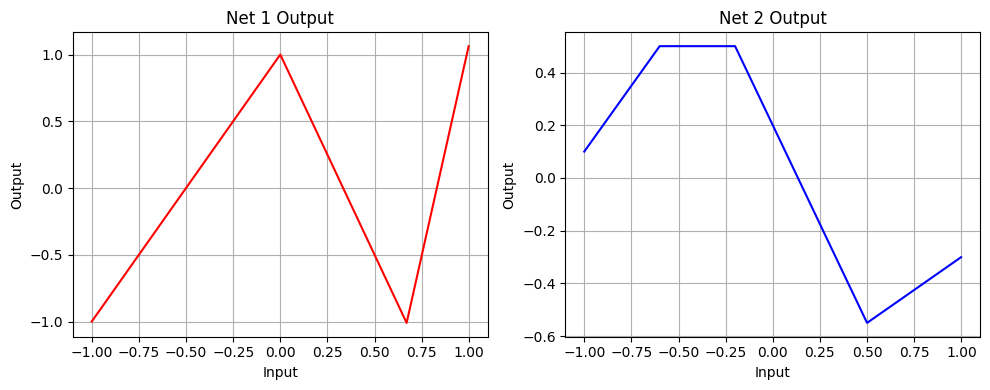

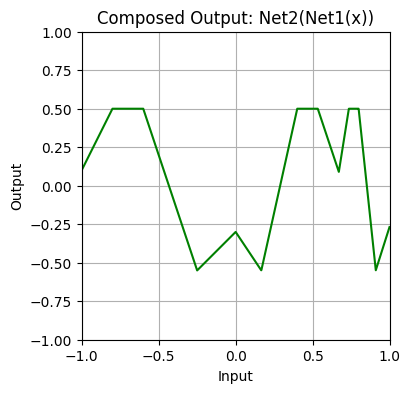

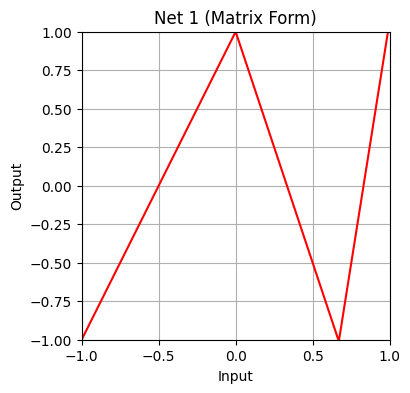

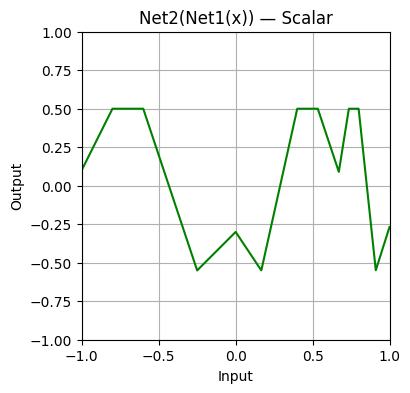

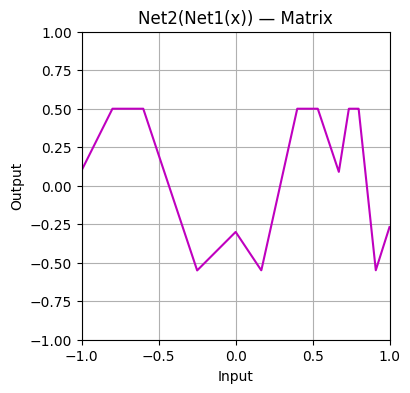

Input X shape: (4, 6)
Output Y shape: (1, 6)
First few input columns:
 [[ 0.882  0.2    0.489]
 [ 0.475 -0.076 -0.052]
 [ 0.381  0.061  0.222]
 [ 0.157 -0.427 -1.276]]
First few output columns:
 [[-0.393 -0.397 -0.392]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0.0, x)

def plot_neural(x, y, title="Network Output", color='k'):
    plt.figure(figsize=(5.2, 4))
    plt.plot(x.T, y.T, color=color)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.title(title)
    plt.grid(True)
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.gca().set_aspect(1.0)
    plt.show()

def plot_neural_two_components(x, net1_out, net2_out, net12_out=None):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].plot(x.T, net1_out.T, 'r-')
    ax[0].set_title("Net 1 Output"); ax[0].set_xlabel("Input"); ax[0].set_ylabel("Output"); ax[0].grid(True)
    ax[1].plot(x.T, net2_out.T, 'b-')
    ax[1].set_title("Net 2 Output"); ax[1].set_xlabel("Input"); ax[1].set_ylabel("Output"); ax[1].grid(True)
    plt.tight_layout(); plt.show()
    if net12_out is not None:
        plt.figure(figsize=(5.2, 4))
        plt.plot(x.T, net12_out.T, 'g-')
        plt.title("Composed Output: Net2(Net1(x))")
        plt.xlabel("Input"); plt.ylabel("Output"); plt.grid(True)
        plt.xlim([-1, 1]); plt.ylim([-1, 1]); plt.gca().set_aspect(1.0)
        plt.show()

def shallow_1_1_3(x, activation_fn,
    phi_0, phi_1, phi_2, phi_3,
    theta_10, theta_11,
    theta_20, theta_21,
    theta_30, theta_31):
    x = np.asarray(x)
    if x.ndim == 1:
        x = x.reshape(1, -1)
    z1 = theta_10 + theta_11 * x
    z2 = theta_20 + theta_21 * x
    z3 = theta_30 + theta_31 * x
    h1 = activation_fn(z1)
    h2 = activation_fn(z2)
    h3 = activation_fn(z3)
    y = phi_0 + phi_1 * h1 + phi_2 * h2 + phi_3 * h3
    return y

n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3 = 1.0, -2.0, -3.0, 9.3
n1_theta_10, n1_theta_11 =  0.0,  -1.0
n1_theta_20, n1_theta_21 =  0.0,   1.0
n1_theta_30, n1_theta_31 = -0.67,  1.0

n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3 = 0.5, -1.0, -1.5, 2.0
n2_theta_10, n2_theta_11 = -0.6, -1.0
n2_theta_20, n2_theta_21 =  0.2,  1.0
n2_theta_30, n2_theta_31 = -0.5,  1.0

x = np.arange(-1.0, 1.0, 0.001)

net1_out = shallow_1_1_3(x, ReLU,
    n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3,
    n1_theta_10, n1_theta_11,
    n1_theta_20, n1_theta_21,
    n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU,
    n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3,
    n2_theta_10, n2_theta_11,
    n2_theta_20, n2_theta_21,
    n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

net12_scalar = shallow_1_1_3(net1_out, ReLU,
    n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3,
    n2_theta_10, n2_theta_11,
    n2_theta_20, n2_theta_21,
    n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_scalar)

beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((1,1))
Omega_1 = np.zeros((1,3))
beta_0[0,0] = n1_theta_10; Omega_0[0,0] = n1_theta_11
beta_0[1,0] = n1_theta_20; Omega_0[1,0] = n1_theta_21
beta_0[2,0] = n1_theta_30; Omega_0[2,0] = n1_theta_31
beta_1[0,0] = n1_phi_0
Omega_1[0,0] = n1_phi_1
Omega_1[0,1] = n1_phi_2
Omega_1[0,2] = n1_phi_3

n_data = x.size
X = x.reshape(1, n_data)
H1 = ReLU(beta_0 + Omega_0 @ X)
Y1 = beta_1 + Omega_1 @ H1
plot_neural(x, Y1, title="Net 1 (Matrix Form)", color='r')

beta_2_0 = np.zeros((3,1))
Omega_2_0 = np.zeros((3,3))
beta_2_1 = np.zeros((1,1))
Omega_2_1 = np.zeros((1,3))
thetas2 = [(n2_theta_10, n2_theta_11),
           (n2_theta_20, n2_theta_21),
           (n2_theta_30, n2_theta_31)]
phis1 = [n1_phi_1, n1_phi_2, n1_phi_3]
for k,(t0,t1) in enumerate(thetas2):
    beta_2_0[k,0] = t0 + t1 * n1_phi_0
    Omega_2_0[k,0] = t1 * phis1[0]
    Omega_2_0[k,1] = t1 * phis1[1]
    Omega_2_0[k,2] = t1 * phis1[2]
beta_2_1[0,0] = n2_phi_0
Omega_2_1[0,0] = n2_phi_1
Omega_2_1[0,1] = n2_phi_2
Omega_2_1[0,2] = n2_phi_3

H2 = ReLU(beta_2_0 + Omega_2_0 @ H1)
Y2 = beta_2_1 + Omega_2_1 @ H2
plot_neural(x, net12_scalar, title="Net2(Net1(x)) — Scalar", color='g')
plot_neural(x, Y2, title="Net2(Net1(x)) — Matrix", color='m')

np.random.seed(0)
D_i = 4; D_1 = 5; D_2 = 2; D_3 = 4; D_o = 1
n_data = 6
Xdeep = np.random.randn(D_i, n_data) * 0.5
beta0 = np.random.randn(D_1, 1) * 0.3
Omega0 = np.random.randn(D_1, D_i) * 0.7
beta1 = np.random.randn(D_2, 1) * 0.3
Omega1 = np.random.randn(D_2, D_1) * 0.7
beta2 = np.random.randn(D_3, 1) * 0.3
Omega2 = np.random.randn(D_3, D_2) * 0.7
beta3 = np.random.randn(D_o, 1) * 0.3
Omega3 = np.random.randn(D_o, D_3) * 0.7
H1 = ReLU(beta0 + Omega0 @ Xdeep)
H2 = ReLU(beta1 + Omega1 @ H1)
H3 = ReLU(beta2 + Omega2 @ H2)
Yd = beta3 + Omega3 @ H3
if H1.shape != (D_1, n_data): print("h1 is wrong shape")
if H2.shape != (D_2, n_data): print("h2 is wrong shape")
if H3.shape != (D_3, n_data): print("h3 is wrong shape")
if Yd.shape != (D_o, n_data): print("Output is wrong shape")
print("Input X shape:", Xdeep.shape)
print("Output Y shape:", Yd.shape)
print("First few input columns:\n", np.round(Xdeep[:, :3], 3))
print("First few output columns:\n", np.round(Yd[:, :3], 3))
